In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_df = pd.DataFrame()

for trait in ['aggression','hate','humor','sarcasm','stance']:
    df = pd.read_csv('../results/hyper_search_{}.csv'.format(trait))
    df = df.sort_values(['weighted_f1'],ascending=[False])
    df = df.drop_duplicates(subset=['config'])
    df['config'] = df.config.apply(eval)
    df = pd.concat([df[['weighted_f1', 'macro_f1']], df.config.apply(pd.Series)], axis=1)
    df['data'] = trait.capitalize()
    
    all_df = pd.concat([all_df,df],axis=0)
    
    df = pd.read_csv('../results/results_{}_detection.csv'.format(trait))
    df = df.sort_values(['weighted_f1'],ascending=[False])
    df = df.drop_duplicates(subset=['config'])
    df['config'] = df.config.apply(eval)
    df = pd.concat([df[['weighted_f1', 'macro_f1']], df.config.apply(pd.Series)], axis=1)
    df['data'] = trait.capitalize()
    
    all_df = pd.concat([all_df,df],axis=0)
    
    all_df = all_df[all_df.use_features == False]
    all_df = all_df[all_df.loss == 'ce']
    
    all_df = all_df.drop_duplicates(subset=['model_name','text_max_len','char_max_len','word_char_max_len','data'])
    

In [3]:
all_df.head()

,weighted_f1,macro_f1,text_max_len,char_max_len,word_char_max_len,n_units,emb_dim,n_layers,epochs,learning_rate,model_name,loss,use_features,data
8,0.903378,0.903198,25,100,20,128,128,2,500,0.001,HAN,ce,False,Aggression
9,0.902998,0.901927,50,100,20,128,128,2,500,0.001,HAN,ce,False,Aggression
6,0.902819,0.902178,10,100,25,128,128,2,500,0.001,HAN,ce,False,Aggression
10,0.901827,0.900716,100,100,20,128,128,2,500,0.001,HAN,ce,False,Aggression
7,0.901272,0.900917,10,100,20,128,128,2,500,0.001,HAN,ce,False,Aggression


In [4]:
markers = {}

In [5]:
all_df[all_df.model_name == 'HAN'].sort_values(['data','macro_f1'],ascending=[False, False])

,weighted_f1,macro_f1,text_max_len,char_max_len,word_char_max_len,n_units,emb_dim,n_layers,epochs,learning_rate,model_name,loss,use_features,data
6,0.902525,0.868118,50,100,20,128,128,2,500,0.001,HAN,ce,False,Stance
10,0.902387,0.866467,30,100,25,128,128,2,500,0.001,HAN,ce,False,Stance
7,0.889542,0.845552,100,100,20,128,128,2,500,0.001,HAN,ce,False,Stance
8,0.884959,0.841639,30,100,5,128,128,2,500,0.001,HAN,ce,False,Stance
9,0.882547,0.839603,30,100,10,128,128,2,500,0.001,HAN,ce,False,Stance
15,0.880714,0.832995,30,150,20,128,128,2,500,0.001,HAN,ce,False,Stance
4,0.858260,0.826038,10,100,20,128,128,2,500,0.001,HAN,ce,False,Stance
5,0.875266,0.821099,25,100,20,128,128,2,500,0.001,HAN,ce,False,Stance
9,0.974334,0.933459,30,100,10,128,128,2,500,0.001,HAN,ce,False,Sarcasm
6,0.970386,0.923222,50,100,20,128,128,2,500,0.001,HAN,ce,False,Sarcasm


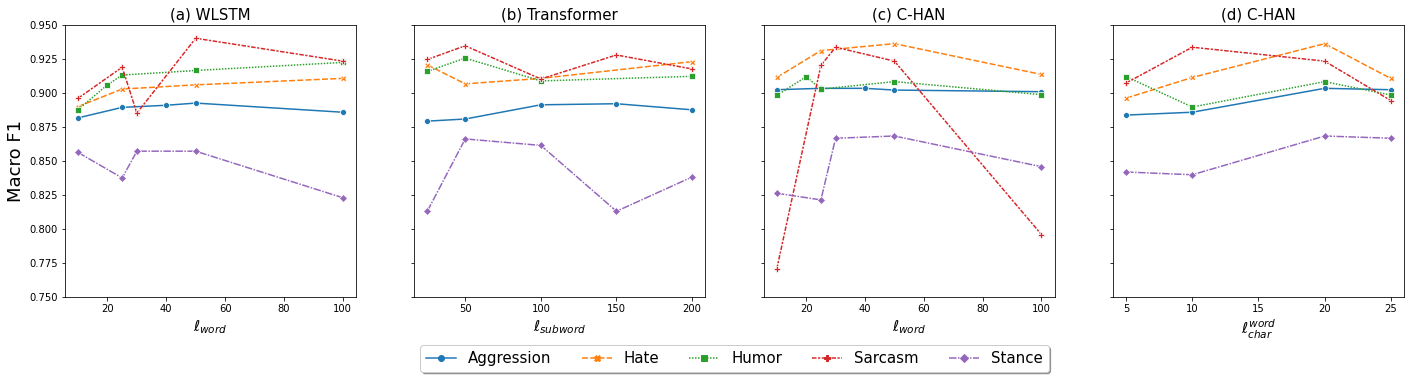

In [6]:
fig, ax = plt.subplots(1,4,figsize=(24,5),sharey=True)

sns.lineplot(data=all_df[all_df.model_name == 'WLSTM'],x="text_max_len", y="macro_f1", hue="data", style='data',markers=True, ax=ax[0],legend=False)
sns.lineplot(data=all_df[all_df.model_name == 'Transformer'],x="char_max_len", y="macro_f1", hue="data",style='data',ax=ax[1],markers=True,legend=False)
sns.lineplot(data=all_df[all_df.model_name == 'HAN'].drop_duplicates(subset=['model_name','text_max_len','data']),x="text_max_len", y="macro_f1", hue="data",style='data',markers=True, ax=ax[2])
sns.lineplot(data=all_df[all_df.model_name == 'HAN'].drop_duplicates(subset=['model_name','word_char_max_len','data']),x="word_char_max_len", y="macro_f1", markers=True,hue="data",style='data',ax=ax[3],legend=False)

plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)

#ax[0][0].legend(loc="upper left").get_frame().set_linewidth(1)

#ax[1][0].legend(loc="upper left")

#ax[0][1].legend(loc="lower right")

#ax[1][1].legend(loc="lower right")

ax[0].set_title("(a) WLSTM")

ax[1].set_title("(b) Transformer")

ax[2].set_title("(c) C-HAN")

ax[3].set_title("(d) C-HAN")

ax[0].set_ylim(0.75,0.95)
ax[1].set_ylim(0.75,0.95)
ax[2].set_ylim(0.75,0.95)
ax[3].set_ylim(0.75,0.95)

ax[0].set_xlabel('$\ell_{word}$', fontsize=15) #'Max Text Word Length'

ax[1].set_xlabel('$\ell_{subword}$', fontsize=15)

ax[2].set_xlabel('$\ell_{word}$', fontsize=15)

ax[3].set_xlabel('$\ell_{char}^{word}$', fontsize=15)

ax[0].set_ylabel('Macro F1', fontsize=18)

ax[1].set_ylabel('Macro F1', fontsize=18)

ax[2].set_ylabel(r'Macro F1', fontsize=18)

ax[3].set_ylabel(r'Macro F1', fontsize=18)


handles, labels = ax[2].get_legend_handles_labels()

#ax[3].legend(handles=handles[1:],labels=labels[1:], loc=7)
ax[2].legend(handles=handles[1:],labels=labels[1:],loc='upper center', bbox_to_anchor=(-.1, -0.15),
          fancybox=True, shadow=True, ncol=5)

#handles, labels = ax[1][1].get_legend_handles_labels()

#ax[1][1].legend(handles=handles,labels=labels, loc="lower right")

plt.rcParams["font.family"] = 'sans-serif'

plt.savefig('../plots/hyper_search.pdf',dpi=200, bbox_inches='tight')
plt.show()

In [7]:
all_df[all_df.model_name == 'HAN']

,weighted_f1,macro_f1,text_max_len,char_max_len,word_char_max_len,n_units,emb_dim,n_layers,epochs,learning_rate,model_name,loss,use_features,data
8,0.903378,0.903198,25,100,20,128,128,2,500,0.001,HAN,ce,False,Aggression
9,0.902998,0.901927,50,100,20,128,128,2,500,0.001,HAN,ce,False,Aggression
6,0.902819,0.902178,10,100,25,128,128,2,500,0.001,HAN,ce,False,Aggression
10,0.901827,0.900716,100,100,20,128,128,2,500,0.001,HAN,ce,False,Aggression
7,0.901272,0.900917,10,100,20,128,128,2,500,0.001,HAN,ce,False,Aggression
5,0.890524,0.885617,10,100,10,128,128,2,500,0.001,HAN,ce,False,Aggression
4,0.889172,0.883519,10,100,5,128,128,2,500,0.001,HAN,ce,False,Aggression
1,0.903378,0.903198,40,150,20,128,128,2,500,0.001,HAN,ce,False,Aggression
9,0.945575,0.936083,50,100,20,128,128,2,500,0.001,HAN,ce,False,Hate
8,0.941221,0.930970,25,100,20,128,128,2,500,0.001,HAN,ce,False,Hate


In [8]:
all_df[all_df.model_name == 'Transformer']

,weighted_f1,macro_f1,text_max_len,char_max_len,word_char_max_len,n_units,emb_dim,n_layers,epochs,learning_rate,model_name,loss,use_features,data
2,0.890868,0.891078,40,100,20,128,128,2,500,0.001,Transformer,ce,False,Aggression
3,0.888383,0.887396,40,200,20,128,128,2,500,0.001,Transformer,ce,False,Aggression
1,0.882026,0.880628,40,50,20,128,128,2,500,0.001,Transformer,ce,False,Aggression
0,0.880833,0.879066,40,25,20,128,128,2,500,0.001,Transformer,ce,False,Aggression
2,0.892820,0.891870,40,150,20,128,128,2,500,0.001,Transformer,ce,False,Aggression
3,0.934498,0.922844,50,200,20,128,128,2,500,0.001,Transformer,ce,False,Hate
0,0.932382,0.920430,50,25,20,128,128,2,500,0.001,Transformer,ce,False,Hate
2,0.923805,0.910516,50,100,20,128,128,2,500,0.001,Transformer,ce,False,Hate
1,0.919892,0.906481,50,50,20,128,128,2,500,0.001,Transformer,ce,False,Hate
1,0.928556,0.925460,20,50,20,128,128,2,500,0.001,Transformer,ce,False,Humor
